<a href="https://colab.research.google.com/github/fajrulsantoso/Pcvk_2025-2026/blob/main/ProjekPBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

procesing




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Import Library

In [2]:
import cv2
import os
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from joblib import dump, load


2. Fungsi Load Dataset + Preprocessing (resize + foreground extraction)

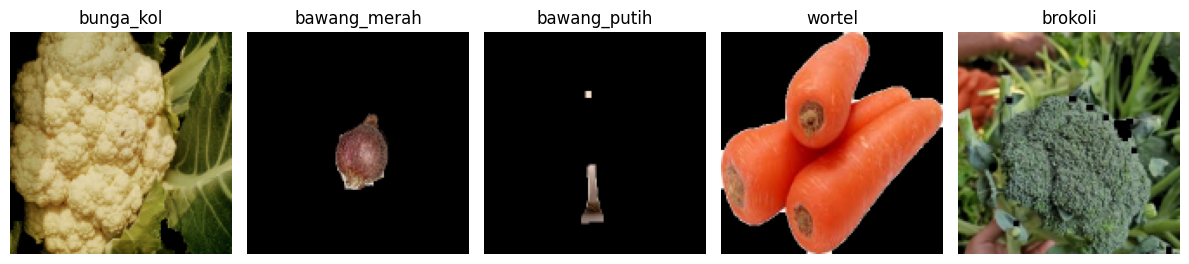

In [11]:
import matplotlib.pyplot as plt
import random
import os

dataset_dir = "/content/drive/MyDrive/DATASETCM/train"

def show_example_per_class(dataset_path):
    class_names = os.listdir(dataset_path)

    plt.figure(figsize=(12, 6))

    index = 1
    for class_name in class_names:
        class_path = os.path.join(dataset_path, class_name)
        if not os.path.isdir(class_path):
            continue

        # Ambil 1 gambar random dari kelas ini
        files = [f for f in os.listdir(class_path) if f.lower().endswith(("jpg","png","jpeg"))]
        if len(files) == 0:
            continue

        img_name = random.choice(files)
        img_path = os.path.join(class_path, img_name)

        # Preprocess gambar
        processed = preprocess_image(img_path)

        # Tampilkan
        plt.subplot(1, len(class_names), index)
        plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
        plt.title(class_name)
        plt.axis("off")

        index += 1

    plt.tight_layout()
    plt.show()

# Jalankan
show_example_per_class(dataset_dir)


3. Ekstraksi Fitur HOG

In [4]:
def extract_hog(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features = hog(
        gray,
        orientations=9,
        pixels_per_cell=(8,8),
        cells_per_block=(2,2),
        block_norm='L2-Hys'
    )
    return features


4. Load Semua Data + Label

In [5]:
def load_dataset(folder_path):
    X = []
    y = []
    label_names = os.listdir(folder_path)

    for label in label_names:
        class_path = os.path.join(folder_path, label)
        if not os.path.isdir(class_path):
            continue

        for file in os.listdir(class_path):
            img_path = os.path.join(class_path, file)
            img = preprocess_image(img_path)

            if img is not None:
                feat = extract_hog(img)
                X.append(feat)
                y.append(label)

    return np.array(X), np.array(y)


5. Load Train dan Train Model SVM

In [6]:
train_path = "/content/drive/MyDrive/DATASETCM/train"
X_train, y_train = load_dataset(train_path)

print("Training shape:", X_train.shape)

model = SVC(kernel="linear", probability=True)
model.fit(X_train, y_train)

# Save model
dump(model, "model_sayur_svm.joblib")
print("Model saved!")


Training shape: (847, 8100)
Model saved!


6. Evaluasi (Testing)

In [7]:
test_path = "/content/drive/MyDrive/DATASETCM/test"
X_test, y_test = load_dataset(test_path)

y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Akurasi: 1.0
              precision    recall  f1-score   support

bawang_merah       1.00      1.00      1.00        31
bawang_putih       1.00      1.00      1.00        30
     brokoli       1.00      1.00      1.00        40
   bunga_kol       1.00      1.00      1.00       188
      wortel       1.00      1.00      1.00        39

    accuracy                           1.00       328
   macro avg       1.00      1.00      1.00       328
weighted avg       1.00      1.00      1.00       328



🚀 7. Inference / Prediksi pada Gambar Baru

Menampilkan contoh hasil preprocess tiap kelas...


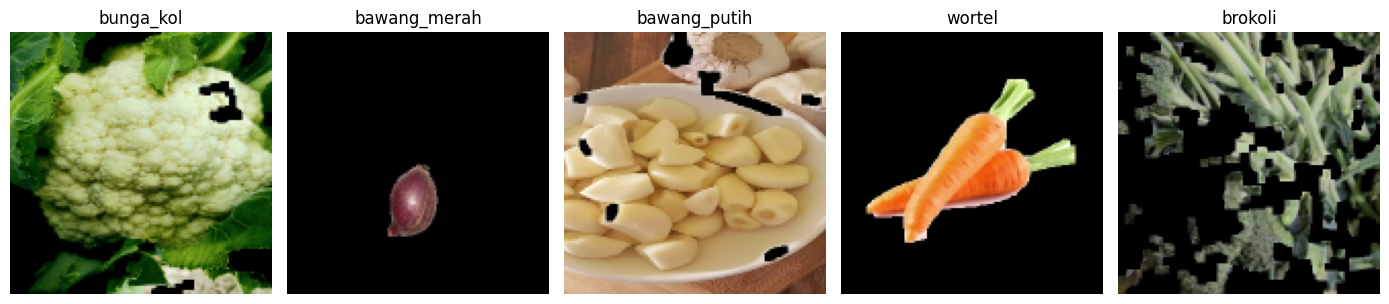

Model Loaded!

Silakan upload gambar sayur...


Saving bawang.jpg to bawang (1).jpg
File diupload: bawang (1).jpg
Prediksi gambar: bawang_putih


In [16]:
# =========================
# IMPORT LIBRARY
# =========================
from google.colab import files
from joblib import load
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt


# =========================
# PREPROCESS IMAGE
# =========================
def preprocess_image(path, size=(128, 128)):
    img = cv2.imread(path)
    if img is None:
        return None

    img = cv2.resize(img, (256, 256))

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    lower = np.array([0, 40, 40])
    upper = np.array([180, 255, 255])
    mask = cv2.inRange(hsv, lower, upper)

    kernel = np.ones((7,7), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    fg = cv2.bitwise_and(img, img, mask=mask)
    final_img = cv2.resize(fg, size)

    return final_img


# =========================
# HOG FEATURE EXTRACTION
# =========================
from skimage.feature import hog

def extract_hog(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features = hog(
        gray,
        orientations=9,
        pixels_per_cell=(8,8),
        cells_per_block=(2,2),
        block_norm='L2-Hys'
    )
    return features


# =========================
# TAMPILKAN 1 CONTOH PER KELAS
# =========================
def show_example_per_class(dataset_path):

    class_names = os.listdir(dataset_path)
    class_names = [c for c in class_names if os.path.isdir(os.path.join(dataset_path, c))]

    plt.figure(figsize=(14, 5))

    idx = 1
    for class_name in class_names:
        class_path = os.path.join(dataset_path, class_name)

        files = [f for f in os.listdir(class_path) if f.lower().endswith(("jpg","jpeg","png"))]
        if len(files) == 0:
            continue

        chosen = random.choice(files)
        img_path = os.path.join(class_path, chosen)
        processed = preprocess_image(img_path)

        plt.subplot(1, len(class_names), idx)
        plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
        plt.title(class_name)
        plt.axis("off")

        idx += 1

    plt.tight_layout()
    plt.show()


# =========================
# TAMPILKAN CONTOH PREPROCESS TIAP KELAS
# =========================
train_dataset = "/content/drive/MyDrive/DATASETCM/train"
print("Menampilkan contoh hasil preprocess tiap kelas...")
show_example_per_class(train_dataset)


# =========================
# LOAD MODEL
# =========================
model = load("model_sayur_svm.joblib")
print("Model Loaded!")


# =========================
# PREDICT IMAGE
# =========================
def predict_image(path):
    img = preprocess_image(path)
    feat = extract_hog(img)
    feat = feat.reshape(1, -1)
    pred = model.predict(feat)[0]
    return pred


# =========================
# UPLOAD GAMBAR SAJA
# =========================
print("\nSilakan upload gambar sayur...")
uploaded = files.upload()

for name in uploaded.keys():
    print("File diupload:", name)
    hasil = predict_image(name)
    print("Prediksi gambar:", hasil)

